# K-means Clustering
In this exercise, you will implement K-means algorithm
Reference Coursera 
https://www.coursera.org/learn/machine-learning

In [1]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np
import pandas as pd

# Import regular expressions to process emails
# Plotting library
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
from scipy.io import loadmat

# 1 K-means Clustering

The K-means algorithm is a method to automatically cluster similar data examples together. Concretely, you are given a training set $\{x^{(1)} , \cdots, x^{(m)}\}$ (where $x^{(i)} \in \mathbb{R}^n$), and want to group the data into a few cohesive “clusters”. The intuition behind K-means is an iterative procedure that starts by guessing the initial centroids, and then refines this guess by repeatedly assigning examples to their closest centroids and then recomputing the centroids based on the assignments.

The K-means algorithm is as follows:

```python
centroids = kMeansInitCentroids(X, K)
for i in range(iterations):
    # Cluster assignment step: Assign each data point to the
    # closest centroid. idx[i] corresponds to cˆ(i), the index
    # of the centroid assigned to example i
    idx = findClosestCentroids(X, centroids)
    
    # Move centroid step: Compute means based on centroid
    # assignments
    centroids = computeMeans(X, idx, K)
```

The inner-loop of the algorithm repeatedly carries out two steps:
* (1) Assigning each training example $x^{(i)}$ to its closest centroid
* (2) Recomputing the mean of each centroid using the points assigned to it. 

The K-means algorithm will always converge to some final set of means for the centroids. Note that the converged solution may not always be ideal and depends on the initial setting of the centroids. Therefore, in practice the K-means algorithm is usually run a few times with different random initializations. One way to choose between these different solutions from different random initializations is to choose the one with the lowest cost function value (distortion). You will implement the two phases of the K-means algorithm separately
in the next sections.

<a id="section1"></a>
## Finding closest centroids

In the “cluster assignment” phase of the K-means algorithm, the algorithm assigns every training example $x^{(i)}$ to its closest centroid, given the current positions of centroids. Specifically, for every example $i$ we set

$$c^{(i)} := j \quad \text{that minimizes} \quad \lvert\rvert x^{(i)} - \mu_j  \lvert\rvert^2, $$

where $c^{(i)}$ is the index of the centroid that is closest to $x^{(i)}$, and $\mu_j$ is the position (value) of the $j^{th}$ centroid. Note that $c^{(i)}$ corresponds to `idx[i]` in the starter code.

Your task is to complete the code in the function `findClosestCentroids`. This function takes the data matrix `X` and the locations of all centroids inside `centroids` and should output a one-dimensional array `idx` that holds the index (a value in $\{1, ..., K\}$, where $K$ is total number of centroids) of the closest centroid to every training example.

You can implement this using a loop over every training example and every centroid.
<a id="findClosestCentroids"></a>

In [2]:
def findClosestCentroids(df, centroids, k):
    """
    Computes the centroid memberships for every example.
    
    Parameters
    ----------
    df        : DataFrame of points 
    k         : Number of cluster
    centroids : Dictionary of each centroid values
    
    Returns
    -------
    df : DataFrame that contains a column describes each point belongs to each centroid
    """
    
    # list of coloumns of distances from each centroid to points
    distances_columns = ['distance_centroid_'+str(i) for i in range(k)]
    
    # calculate euclidean distance from each centroid to points 
    for i in range(k):
        df[distances_columns[i]] = np.sqrt(np.square(df['x']-centroids[i][0]) + np.square(df['y']-centroids[i][1]))
    
    # calculating the closet centroid for each point
    df['closest_centroid'] = df[distances_columns].idxmin(axis=1)
    df['closest_centroid'] = df['closest_centroid'].str[-1:].astype(int)
    
    # drop the distances_columns from DataFrame
    df.drop(distances_columns, axis=1, inplace=True)
    
    return df

<a id="section2"></a>
## Update centroid means

Given assignments of every point to a centroid, the second phase of the algorithm recomputes, for each centroid, the mean of the points that were assigned to it. Specifically, for every centroid $k$ we set

$$ \mu_k := \frac{1}{\left| C_k\right|} \sum_{i \in C_k} x^{(i)}$$

where $C_k$ is the set of examples that are assigned to centroid $k$. Concretely, if two examples say $x^{(3)}$ and $x^{(5)}$ are assigned to centroid $k = 2$, then you should update $\mu_2 = \frac{1}{2} \left( x^{(3)} + x^{(5)} \right)$.



In [3]:
def updateCentroids(df, centroids):
    """
    Returns the new updated centroids values by computing the means of the data points
    assigned to each centroid.
    
    Parameters
    ----------
    df        : DataFrame of points 
    centroids : Dictionary of each centroid values
    
    Returns
    -------
    centroids : Dictionary of updated centroid values
    """
   
    # group by each closest centroid
    # then calculate the mean in x,y values
    # then update the original centroids with the new values
    
    for i in centroids.keys():
        centroids[i][0] = df.groupby('closest_centroid')[['x','y']].mean().loc[i].loc['x']
        centroids[i][1] = df.groupby('closest_centroid')[['x','y']].mean().loc[i].loc['y']

    return centroids

## Build KMeans Function

In [4]:
def k_kmeans(df, k=3, iterations=10):
    """
    Returns the final centroids values of each cluster in data.
    
    Parameters
    ----------
    df         : DataFrame of data points
    k          : Number of cluster with default value= 3
    iterations : Number of updating centroid values with default value= 10
    
    Returns
    -------
    centroids : Dictionary of final centroids values of each cluster in data.
    """
    
    # create centroids randomly
    np.random.seed(0)
    centroids = {
        i : [np.random.randint(min(df['x']), max(df['x'])), np.random.randint(min(df['y']), max(df['y']))]
        for i in range(k)
    }
    
    # updating centroids values according to the number of iterations
    for i in range(iterations):
        df = findClosestCentroids(df, centroids, k)
        centroids = updateCentroids(df, centroids)
    
    return centroids

## Test & Plot

In [5]:
# Load an example dataset
data = loadmat('datafile.mat')
df = pd.DataFrame(data['X'], columns=['x', 'y'])
df

,x,y
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894
...,...,...
295,7.302787,3.380160
296,6.991984,2.987067
297,4.825534,2.779617
298,6.117681,2.854757


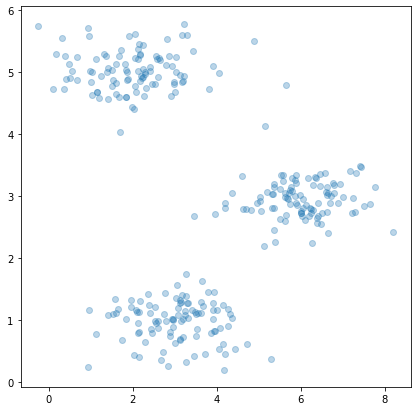

In [6]:
# plot and visualize the data
plt.figure(figsize=(7,7))
plt.scatter(df['x'], df['y'], alpha=0.3);

In [7]:
# Using KMean Function
test_centroids = k_kmeans(df)

In [8]:
test_centroids

{0: [6.033667356017604, 3.0005251118352563],
 1: [1.9539946648593873, 5.025570059426876],
 2: [3.0436711927398137, 1.0154104079486552]}

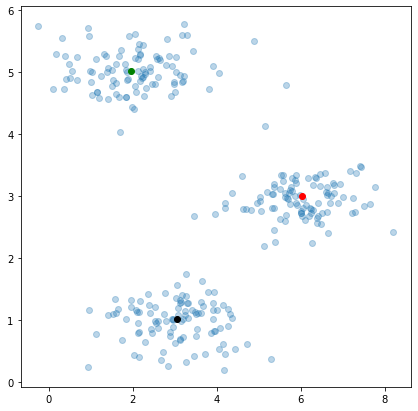

In [9]:
colourmap = {0:'r', 1:'g', 2:'k'}
plt.figure(figsize=(7,7))
plt.scatter(df['x'], df['y'], alpha=0.3);
for i in test_centroids.keys():
    plt.scatter(*test_centroids[i], color=colourmap[i])

# Done